## Introduction to Machine Learning

## Linear Regression

### Machine Learning definition


__“The field of study that gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959)__


__Example: Self-driving cars__
- Rule-based: Tell the car the rules for all possible scenarios
- Machine Learning: Let the car record the scenery and your reactions, then let it predict the next reaction





### Rule-based systems: examples and limitation

- Credit card fraud detection https://fraud.net/d/rules-based-fraud-detection/
- Loan application approval  https://www.researchgate.net/publication/220841474_Presenting_a_Rule_Based_Loan_Evaluation_Expert_System
- __Problem:__ too many rules. 
Works only for specific domains with limited, clear rules, e.g. chess

### Learning from examples without explicit programming
- Self-driving vehicles
- Image classification https://www.kaggle.com/competitions/dogs-vs-cats
- Language translation
    
### Resources

- __Book__
    - https://hastie.su.domains/Papers/ESLII.pdf


- __Communities__
    - https://www.kdnuggets.com/
    - https://www.kaggle.com/


- __Key Influencers__
    - Andrew Ng
    - Yann LeCun
    - ...

### Sci-kit learn
- https://scikit-learn.org/stable/

### Linear Regression

- Supervised learning algorithm

- Maps Label _y_ to Features _X_ using a linear expression: $y = c_0 + c_1 x_1 + c_2 x_2 + ... +c_N x_N$

- Label _y_ is continuous numerical

- Training a linear regression model means computing its coefficients to minimize model error (optimization problem)

- Parametric model

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

### Data

#### Import and inspect Boston Housing data
- https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

#### Data dictionary:

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 USD
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000 USD


In [2]:
df = pd.read_csv("../data/Boston_Housing.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
## sns.pairplot(data = df)
## sns.heatmap(abs(df.corr()))

### Create Feature and Label arrays

- Note that sklearn requires data in a form of a numerical (NumPy) arrays:
    - Label array (1d)
    - Features array (2d)

In [7]:
## Label is the column which we are trying to predict
label_col = 'MEDV'
y = df[label_col].values

In [8]:
## Features are the predictor columns

feature_names = list(df.columns) ## note that we can leave some of the columns out of the feature set
feature_names.remove(label_col)
print(feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [9]:
X = df[feature_names].values

print(X.shape, y.shape)

type(X)

(506, 12) (506,)


numpy.ndarray

### Train a Linear Regression model

In [10]:
### create an empty linear regression model as a Python object

lrm = LinearRegression()

In [11]:
### use .fit() method to train the model on X and y. Note that .fit() is executed in-place

lrm.fit(X, y)

LinearRegression()

In [12]:
## display model coefficients
lrm.coef_

array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

In [13]:
lrm.intercept_

41.61727017595486

#### Model Interpretation

- What is the meaning of each coefficient (a.k.a "slope")

In [14]:
model_interpretation = pd.DataFrame({'Feature': feature_names, 'Coef':lrm.coef_, 
                                     'Min' : X.min(axis = 0), 'Max': X.max(axis = 0)})
model_interpretation

,Feature,Coef,Min,Max
0,CRIM,-0.121389,0.00632,88.9762
1,ZN,0.046963,0.00000,100.0000
2,INDUS,0.013468,0.46000,27.7400
3,CHAS,2.839993,0.00000,1.0000
4,NOX,-18.758022,0.38500,0.8710
5,RM,3.658119,3.56100,8.7800
6,AGE,0.003611,2.90000,100.0000
7,DIS,-1.490754,1.12960,12.1265
8,RAD,0.289405,1.00000,24.0000
9,TAX,-0.012682,187.00000,711.0000


#### Feature Scaling

- Model coefficients represent the magnitude of the dependency between the features `X` and the label `y`
- The magnitude of each coefficient also depends on the scale of the feature. Example: the coefficient for `DIS`  would be 1000x greater if the feature was expressed in meters than if it was in kilometers. The coefficient for `TAX` would be 10000x greater if `TAX` was expressed in dollars
- Feature scaling to a common range (e.g., 0 ...1) is a common step in ML data prep (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- Alternatively, features can be "standardized" (we will talk more about standardization)

In [15]:
scale = MinMaxScaler() ##create a scaler object
scale.fit(X) ## fit the scaler, i.e., determine the min, max and ranges of the features
X = scale.transform(X) ## apply the transformation to our feature set X
## Note: you don't need to scale the label y

#### Retrain the model using scaled features:

In [16]:
lrm = LinearRegression()
lrm.fit(X, y)
model_interpretation_scaled = pd.DataFrame({'Feature': feature_names, 'Coef':lrm.coef_, 
                                     'Min' : X.min(axis = 0), 'Max': X.max(axis = 0)})
model_interpretation_scaled

,Feature,Coef,Min,Max
0,CRIM,-10.799931,0.0,1.0
1,ZN,4.696346,0.0,1.0
2,INDUS,0.367399,0.0,1.0
3,CHAS,2.839993,0.0,1.0
4,NOX,-9.116399,0.0,1.0
5,RM,19.091723,0.0,1.0
6,AGE,0.350600,0.0,1.0
7,DIS,-16.393669,0.0,1.0
8,RAD,6.656304,0.0,1.0
9,TAX,-6.645358,0.0,1.0


In [17]:
model_interpretation_scaled ##.sort_values('Coef')

,Feature,Coef,Min,Max
0,CRIM,-10.799931,0.0,1.0
1,ZN,4.696346,0.0,1.0
2,INDUS,0.367399,0.0,1.0
3,CHAS,2.839993,0.0,1.0
4,NOX,-9.116399,0.0,1.0
5,RM,19.091723,0.0,1.0
6,AGE,0.350600,0.0,1.0
7,DIS,-16.393669,0.0,1.0
8,RAD,6.656304,0.0,1.0
9,TAX,-6.645358,0.0,1.0


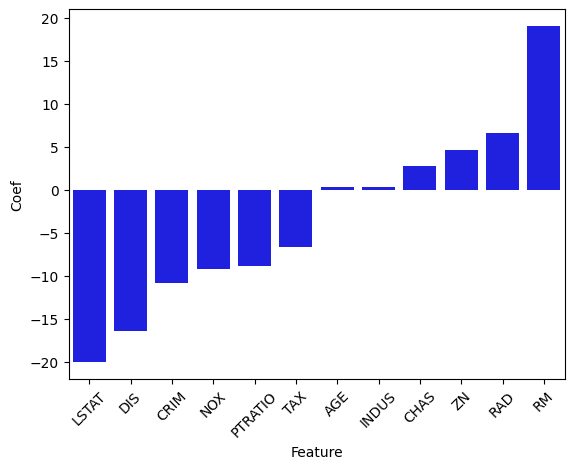

In [18]:
ax = sns.barplot(x = 'Feature', y = 'Coef', data = model_interpretation_scaled.sort_values('Coef'), color = 'blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

### Model Scoring

- How good is our predictive model?
- Compare known and predicted values of the label `y` vs `y_pred`

#### Mean Squared Error and R-squared

In [19]:
mean_squared_error(y, lrm.predict(X))

22.429681439489926

- MSE is a mean squared difference between the known and predicted values of `y`

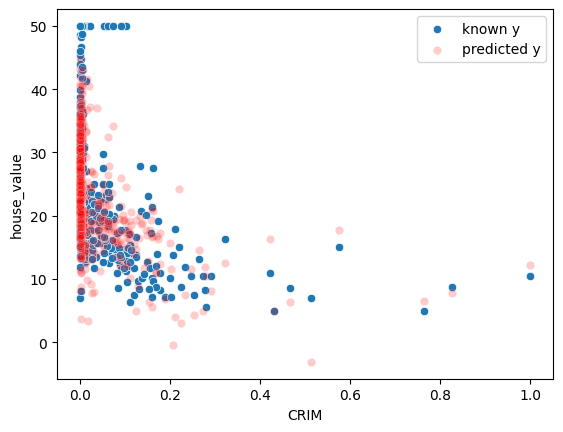

In [20]:
feat = 0 ## try 5
ax = sns.scatterplot(x = X[:,feat], y = y, label = 'known y')
ax = sns.scatterplot(x = X[:,feat], y = lrm.predict(X), color = 'red', alpha = 0.2, label = 'predicted y')
ax.set_xlabel(feature_names[feat])
ax.set_ylabel('house_value')
ax.legend()
plt.show()

In [21]:
r2_score(y, lrm.predict(X))

0.7343070437613076


<img src="../images/Rsquared.png" alt="KNN" width="600" height="600">


- If MSE is the same as Total Variance, then R squared is 0
- If MSE is 0 then R squared is 1

##### what happens to model scores if we use fewer features?

In [22]:
features_subset = [2, 3, 6] ## select 3 out of 12 features
df.columns[features_subset]

Index(['INDUS', 'CHAS', 'AGE'], dtype='object')

In [23]:
lrm1 = LinearRegression()
lrm1.fit(X[:,features_subset], y)
mean_squared_error(y, lrm1.predict(X[:, features_subset]))

60.27397911824503

In [24]:
r2_score(y, lrm1.predict(X[:, features_subset]))

0.2860187631554736

#### MSE and R squared in depth
##### Residuals and Total Variance

In [25]:
mean_squared_error(y, lrm.predict(X))

22.429681439489926

In [26]:
## Compute MSE explicitly

(((y - lrm.predict(X))**2).sum())/len(y) ### mean squares of the differences between predicted and actual y 

### MSE is variance with respect to the model
### i.e. variance not explained by the model or resudual variance

22.429681439489926

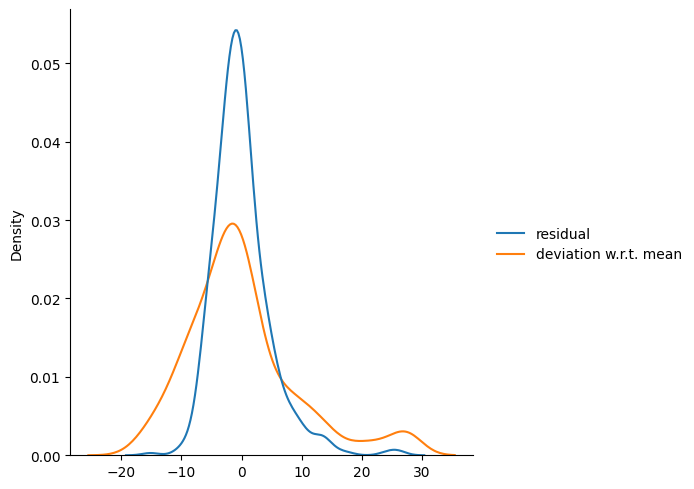

In [27]:
deviations = pd.DataFrame({"residual": y - lrm.predict(X), 'deviation w.r.t. mean': y - y.mean()})
sns.displot(data = deviations, kind = 'kde')
plt.show()

#### Good model fit: residual distriibution is narrower than the distribution with respect to the mean
- Residual represents the noise which is not explained by the model


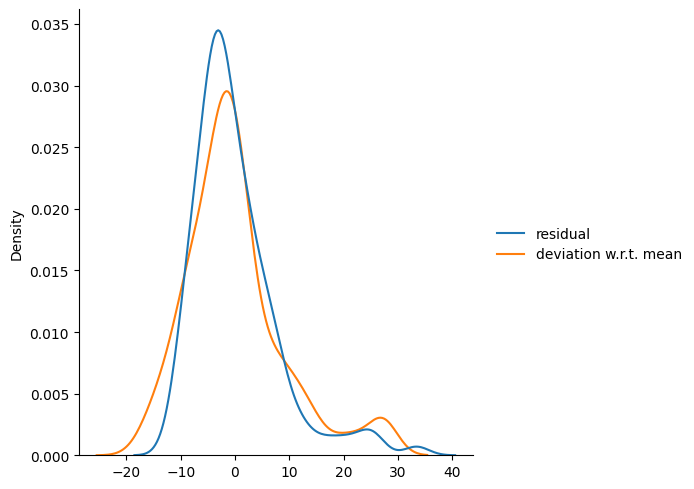

In [28]:
deviations1 = pd.DataFrame({"residual": y - lrm1.predict(X[:,features_subset]), 'deviation w.r.t. mean': y - y.mean()})
sns.displot(data = deviations1, kind = 'kde')
plt.show()

In [29]:
mean_squared_error(y, lrm1.predict(X[:, features_subset]))

60.27397911824503

### Are we scoring our models correctly?

So far, we have been computing MSE and $R^2$ on the data used to train the model. This may lead to over-optimistic scores as the data has been already seen by the model when it was trained 

We need to understand our model's performance on new (previously unseen) data

##### To simulate "new data", we can split the original data set into two parts
- Training set (50-90 %)
- Test set (the remainder)
    - random splitting works and is preferrable for most data types

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X[:, features_subset], y, train_size = 0.7, random_state=12)

In [31]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [32]:
### training error

mean_squared_error(y_train, lrm.predict(X_train))

59.560793856154596

In [33]:
### test error

mean_squared_error(y_test, lrm.predict(X_test))

62.428606298660235

### Discussion: which MSE is more important for model performance?

- Train error
    - OR
- Test error

### Overfit and Underfit

#### Example: a simple simulated data set with built-in non-linearity
- Can we make good predsictions with a linear regression model?

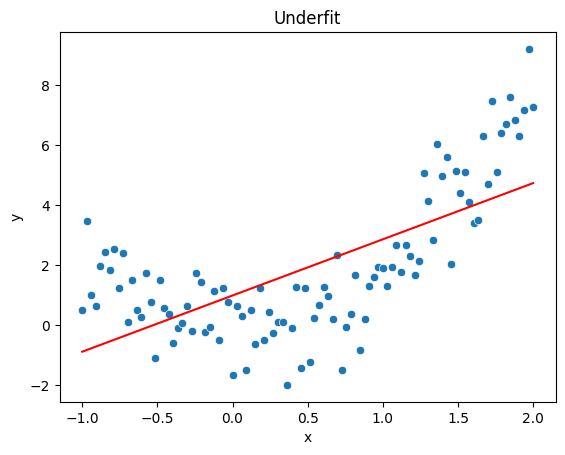

In [34]:
xx = np.linspace(-1, 2, 100)
simdf = pd.DataFrame({ "x": xx, "y": 2*xx**2 + np.random.normal(size = 100)})
lrm = LinearRegression()
lrm.fit(simdf[['x']], simdf['y'])
ax = sns.scatterplot(data = simdf, x = 'x', y = 'y')
ax = sns.lineplot(x = simdf['x'], y = lrm.predict(simdf[['x']]), color = 'red')
ax.set_title("Underfit")
plt.show()

__To help or linear model deal with non-linearity, we can introduce polynomial features of Degree N:__

- if $N = 1$ we have only the original features $x_1$ and $x_2$ 
- if $N = 2$ we will also have quadratic terms $x_1^2$, $x_2^2$ and $x_1 x_2$ 
- if $N = 3$ we will also have cubic terms $x_1^3$, $x_2^3$, $x_1^2 x_2$ and $x_1 x_2^2$ 

In [35]:
poly = PolynomialFeatures(degree=2)
X_train, X_test, Y_train, Y_test = \
    train_test_split(poly.fit_transform(simdf[['x']]), simdf['y'], train_size = 0.8, random_state=42)

train mse:   0.9764919205942444
test mse:   1.3054075621842767


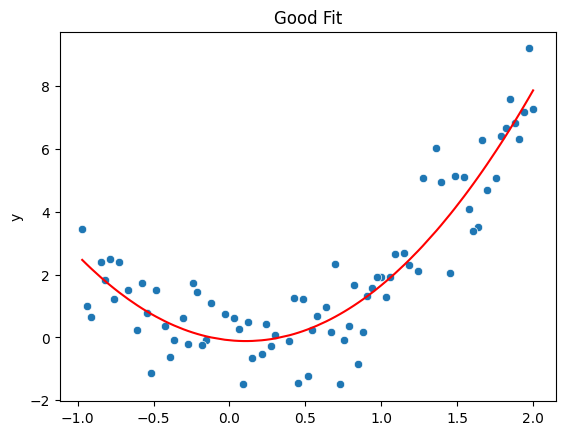

In [36]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)
print("train mse:  ", mean_squared_error(Y_train, lrm.predict(X_train)))
print("test mse:  ", mean_squared_error(Y_test, lrm.predict(X_test)))
ax = sns.scatterplot(x = X_train[:,1], y = Y_train)
ax = sns.lineplot(x = X_train[:,1], y = lrm.predict(X_train), color = 'red')
ax.set_title("Good Fit")
plt.show()

train mse:   0.7621085835966275
test mse:   4.554571017757902


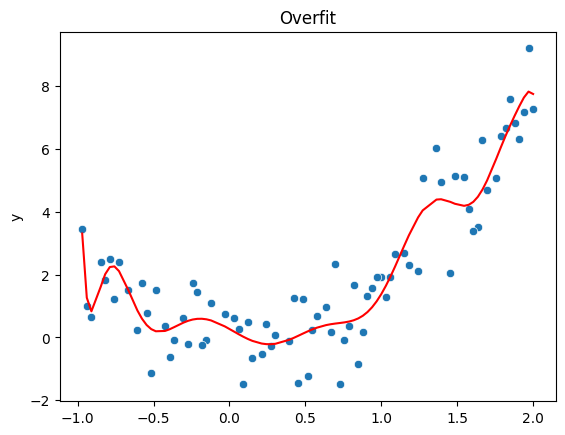

In [37]:
poly = PolynomialFeatures(degree=16)
X_train, X_test, Y_train, Y_test = \
    train_test_split(poly.fit_transform(simdf[['x']]), simdf['y'], train_size = 0.8, random_state=42)
lrm = LinearRegression()
lrm.fit(X_train, Y_train)
print("train mse:  ", mean_squared_error(Y_train, lrm.predict(X_train)))
print("test mse:  ", mean_squared_error(Y_test, lrm.predict(X_test)))
ax = sns.scatterplot(x = X_train[:,1], y = Y_train)
ax = sns.lineplot(x = X_train[:,1], y = lrm.predict(X_train), color = 'red')
ax.set_title("Overfit")
plt.show()

##### Polynomial degree represents model complexity. Let's see how model complexity affects MSE_test

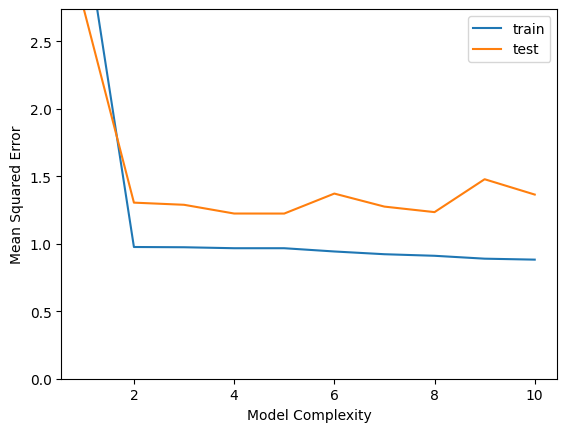

In [38]:
mse_train = []
mse_test = []

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_train, X_test, Y_train, Y_test = \
        train_test_split(poly.fit_transform(simdf[['x']]), simdf['y'], train_size = 0.8, random_state=42)
    lrm = LinearRegression()
    lrm.fit(X_train, Y_train)
    mse_train.append(mean_squared_error(Y_train, lrm.predict(X_train)))
    mse_test.append(mean_squared_error(Y_test, lrm.predict(X_test)))

    
ax = sns.lineplot(x = np.arange(1,11), y = mse_train, label = "train")
ax = sns.lineplot(x = np.arange(1,11), y = mse_test, label = "test")
ax.set_xlabel("Model Complexity")
ax.set_ylim((0, max(mse_test)))
#ax.set_xlim((0, 10))
ax.set_ylabel("Mean Squared Error")
plt.show()

### Overfit demo: Boston Housing polynomial regression

In [39]:
df = pd.read_csv("../data/Boston_Housing.csv")
label_col = 'MEDV'
y = df[label_col].values
feature_names = list(df.columns) ## note that we can leave some of the columns out of the feature set
feature_names.remove(label_col)
X = X[:, features_subset]

In [40]:
poly = PolynomialFeatures()

X_train, X_test, Y_train, Y_test = \
    train_test_split(poly.fit_transform(X), y, train_size = 0.8, random_state=42)

lrm = LinearRegression()
lrm.fit(X_train, Y_train)

print("train mse:  ", mean_squared_error(Y_train, lrm.predict(X_train)))
print("test mse:  ", mean_squared_error(Y_test, lrm.predict(X_test)))

train mse:   57.17866614074181
test mse:   50.10736027391143


In [41]:
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

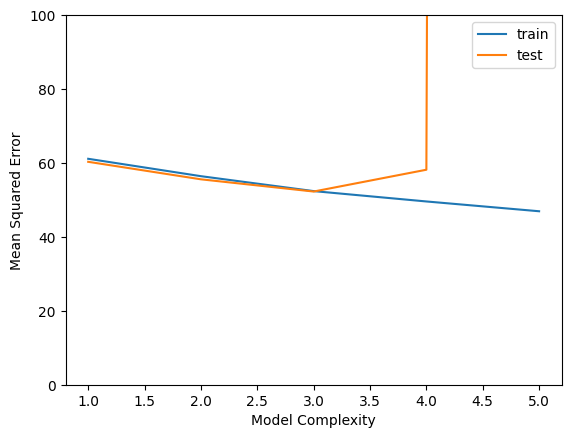

In [42]:
mse_train = []
mse_test = []

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_train, X_test, Y_train, Y_test = \
        train_test_split(poly.fit_transform(X), y, train_size = 0.5, random_state=42)
    lrm = LinearRegression()
    lrm.fit(X_train, Y_train)
    mse_train.append(mean_squared_error(Y_train, lrm.predict(X_train)))
    mse_test.append(mean_squared_error(Y_test, lrm.predict(X_test)))

    
ax = sns.lineplot(x = np.arange(1,6), y = mse_train, label = "train")
ax = sns.lineplot(x = np.arange(1,6), y = mse_test, label = "test")
ax.set_xlabel("Model Complexity")
ax.set_ylim((0, 100))
ax.set_ylabel("Mean Squared Error")
plt.show()